Q1Explain the concept of batch normalization in the context of Artificial Neural Network in short

ans

Batch normalization is a technique used in artificial neural networks to improve the training process and performance. It works by normalizing the inputs of each layer, typically mini-batches, to have a mean of zero and standard deviation of one. This helps to stabilize and speed up the training process by reducing internal covariate shift, which is the change in the distribution of network activations due to parameter updates during training. By normalizing the inputs, batch normalization allows for more stable gradients and faster convergence, leading to improved performance and generalization of the neural network.

Q2.Describe the benefits of using batch normalization during training

Ans:
Using batch normalization during training offers several benefits:

Stabilizes Training: Batch normalization helps stabilize the training process by reducing internal covariate shift. This means that the distribution of inputs to each layer remains more consistent throughout training, which can lead to faster convergence and more stable training dynamics.

Faster Convergence: Normalizing the inputs of each layer speeds up the training process by allowing for more stable gradients. This helps prevent the vanishing or exploding gradient problems that can occur during training, especially in deeper networks. As a result, neural networks with batch normalization typically converge faster.

Improved Gradient Flow: Batch normalization ensures that gradients propagated backward through the network are more consistent in magnitude, which can help alleviate the issue of vanishing or exploding gradients. This enables more efficient optimization and learning in deeper networks.

Regularization Effect: Batch normalization introduces a slight amount of noise during training, similar to dropout regularization. This noise can act as a form of regularization, helping prevent overfitting and improving the generalization ability of the model.

Allows for Higher Learning Rates: With batch normalization, neural networks can often use higher learning rates without experiencing instability during training. This can accelerate the learning process and potentially lead to better performance on the validation and test sets.

Reduces Sensitivity to Initialization: Batch normalization makes neural networks less sensitive to the choice of weight initialization, which can simplify the process of training deep networks. This means that the network is less likely to get stuck in local minima or saddle points during optimization.

Q3.Discuss the working principle of batch normalization, including the normalization step and the learnable
parameters

Ans:

Batch normalization works by normalizing the inputs of each layer in a neural network, typically mini-batches, to have a mean of zero and a standard deviation of one. This normalization step is applied before the activation function of each layer.


In [2]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 50.1 MB/s eta 0:00:0000:01:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 69.5 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 79.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 73.9 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 60.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 75.1 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 50.3 MB/

In [3]:
import tensorflow as tf
print(tf.__version__)

2024-04-12 13:08:51.806873: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-12 13:08:51.811604: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-12 13:08:51.885773: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-12 13:08:53.195811: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


2.16.1


In [4]:
#load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [5]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

5


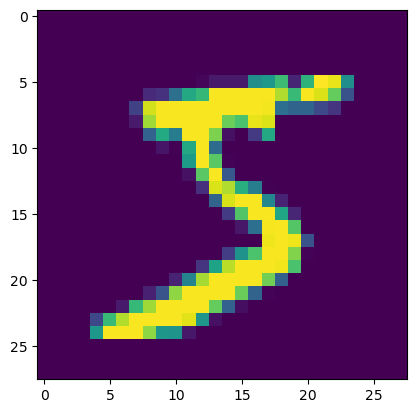

In [7]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print(y_train[0])

In [8]:
#scaling the train and test data
x_train = x_train/255., 
x_test  = x_test/255.

In [12]:
#creating model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation = "relu"),
    tf.keras.layers.Dense(64,activation = "relu"),
    tf.keras.layers.Dense(10,activation = "softmax")
            ])
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer = "adam",
              metrics = ["accuracy"]
             )
model.fit(x_train,y_train,epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8780 - loss: 0.4247
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9689 - loss: 0.1036
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9783 - loss: 0.0699
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9830 - loss: 0.0523
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9864 - loss: 0.0417
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9889 - loss: 0.0321
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9904 - loss: 0.0283
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9926 - loss: 0.0224
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9931 - loss: 0.0204
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9948 - loss: 0.0151


In [ ]:
#accuracy: 0.9948 

In [14]:
#creating model with batch normalization
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation = "relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64,activation = "relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10,activation = "softmax")
            ])
model_1.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer = "adam",
              metrics = ["accuracy"]
             )
model_1.fit(x_train,y_train,epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8780 - loss: 0.4093
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9623 - loss: 0.1258
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9701 - loss: 0.0951
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9775 - loss: 0.0722
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9792 - loss: 0.0632
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9815 - loss: 0.0578
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9835 - loss: 0.0532
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9852 - loss: 0.0452
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9869 - loss: 0.0398
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9881 - loss: 0.0364


In [16]:
 #accuracy: 0.9881 

 Discuss the advantages and potential limitations of batch normalization in improving the training of
neural networks.
ans:
Stabilizes Training: Batch normalization helps stabilize the training process by reducing internal covariate shift. Regardless of the batch size, batch normalization ensures that the inputs to each layer have a consistent distribution, which can lead to more stable gradients and faster convergence.

Allows for Larger Learning Rates: Batch normalization enables the use of larger learning rates during training. This is beneficial because larger learning rates can speed up convergence and potentially help the model escape local minima more easily. With batch normalization, the model is less likely to diverge or experience unstable training dynamics even with larger learning rates.

Improves Generalization: By normalizing the inputs to each layer, batch normalization can act as a form of regularization. This helps prevent overfitting and improves the generalization ability of the model. Models trained with batch normalization tend to have better performance on unseen data compared to models trained without it.

Reduces Sensitivity to Initialization: Batch normalization makes neural networks less sensitive to the choice of weight initialization. This can simplify the training process, as finding an appropriate initialization strategy becomes less critical. The model is less likely to get stuck in local minima or saddle points during optimization.

Limitations:
Increased Computational Overhead: Although batch normalization improves training dynamics, it comes with an additional computational cost. Computing the mean and variance of each feature dimension for every mini-batch during training adds overhead, which can slow down training, especially for larger models or when using smaller batch sizes.

Dependence on Batch Size: Batch normalization relies on statistics computed from the mini-batch. As a result, the effectiveness of batch normalization can be affected by the choice of batch size. Smaller batch sizes may result in noisier estimates of the batch statistics, which can degrade performance. Choosing an appropriate batch size is crucial for effective batch normalization.